# Obligatorio - Machine Learning

### Universidad ORT

#### Alumnos : Felipe Bastarrica (158687), Aldo Gioda (XXXXXX), Esteban Maestro (XXXXXX)

## Library Installation

In [5]:
!pip install wandb
!pip install gradio

  Using cached wandb-0.15.4-py3-none-any.whl (2.1 MB)
  Using cached setproctitle-1.3.2-cp38-cp38-manylinux_2_5_x86_64.manylinux1_x86_64.manylinux_2_17_x86_64.manylinux2014_x86_64.whl (31 kB)
  Using cached appdirs-1.4.4-py2.py3-none-any.whl (9.6 kB)
  Using cached pathtools-0.1.2.tar.gz (11 kB)
  Using cached sentry_sdk-1.25.1-py2.py3-none-any.whl (206 kB)
  Using cached docker_pycreds-0.4.0-py2.py3-none-any.whl (9.0 kB)
  Created wheel for pathtools: filename=pathtools-0.1.2-py3-none-any.whl size=8785 sha256=0ff3a3ff1381e81c7274c42ff22a68558910b2ce8b14984c04e4adc5dcaba5be
  Stored in directory: /home/azureuser/.cache/pip/wheels/4c/8e/7e/72fbc243e1aeecae64a96875432e70d4e92f3d2d18123be004
Successfully built pathtools


### Blob Connection and log parser

In [1]:
import pandas as pd
import json
import numpy as np


from io import StringIO
from azure.storage.blob import BlobServiceClient, BlobClient, ContainerClient

# Connection to Container
connection_string = "DefaultEndpointsProtocol=https;AccountName=cs210032001db9f06eb;AccountKey=Q7i41vK6zB2p/aKXulAdSROpoIou5uYj+EulJri7p9VI9VH4Us+Rlj+9fo5GC78TxSlPNQEWaDVY+AStDBpAfA==;EndpointSuffix=core.windows.net"
container_name = "container-ml"
blob_name = "properties_gallito.jl"

blob_service_client = BlobServiceClient.from_connection_string(connection_string)
container_client = blob_service_client.get_container_client(container_name)

blob_client = container_client.get_blob_client(blob_name)
csv_data = blob_client.download_blob().content_as_text()

# Replace commas for correct dataframe formation
csv_data2 = csv_data.replace(".jpg\",",".jpg\";").replace(", \"status\":","; \"status\":").replace(", {\"url\":", "; {\"url\":")

data = StringIO(csv_data2)
df = pd.read_csv(data, header=None, on_bad_lines='skip')

print(csv_data2)


IOPub data rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_data_rate_limit`.

Current values:
ServerApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
ServerApp.rate_limit_window=3.0 (secs)



In [2]:
# Example of parsed images
df[7][0]

' "images": [{"url": "https://imagenes.gallito.com/1024x768/48931854.jpg"; "path": "full/0e040e8540402ac852cd676ef0fd88cb2f42c489.jpg"; "checksum": "36f868e1b1dfd5f8613ab70866eff078"; "status": "downloaded"}; {"url": "https://imagenes.gallito.com/1024x768/48931855.jpg"; "path": "full/6b52d350a917976ba33dbbe3e92aa92abe0886c3.jpg"; "checksum": "fee765fbc56e992a8f6f55e42e184cfa"; "status": "downloaded"}; {"url": "https://imagenes.gallito.com/1024x768/48931856.jpg"; "path": "full/0d98d020f7793c4f7446638a011aa5dd03197cd3.jpg"; "checksum": "738d5ef27711272f2571ee8eb4486e90"; "status": "downloaded"}; {"url": "https://imagenes.gallito.com/1024x768/48931857.jpg"; "path": "full/2f8528d1b71540460d9237dcf1870412751d4093.jpg"; "checksum": "301cb3880553b5f3e60cec13e381d06e"; "status": "downloaded"}; {"url": "https://imagenes.gallito.com/1024x768/48931858.jpg"; "path": "full/690de228ed7bbff8edd02f01a2942202c08d0e06.jpg"; "checksum": "7ee08eddedb2864d5737239dc514fbfb"; "status": "downloaded"}; {"url":

In [3]:
# Dataframe from properties file
df.head()

,0,1,2,3,4,5,6,7
0,"{""id"": ""23811743""","""image_urls"": [""https://imagenes.gallito.com/...","""source"": ""gallito""","""url"": ""https://www.gallito.com.uy/venta-exce...","""link"": ""https://www.gallito.com.uy/venta-exc...","""property_type"": ""HOUSE""","""property_rooms"": ""+4D""","""images"": [{""url"": ""https://imagenes.gallito...."
1,"{""id"": ""23839777""","""image_urls"": [""https://imagenes.gallito.com/...","""source"": ""gallito""","""url"": ""https://www.gallito.com.uy/casona-en-...","""link"": ""https://www.gallito.com.uy/casona-en...","""property_type"": ""HOUSE""","""property_rooms"": ""+4D""","""images"": [{""url"": ""https://imagenes.gallito...."
2,"{""id"": ""20670463""","""image_urls"": [""https://imagenes.gallito.com/...","""source"": ""gallito""","""url"": ""https://www.gallito.com.uy/venta-casa...","""link"": ""https://www.gallito.com.uy/venta-cas...","""property_type"": ""HOUSE""","""property_rooms"": ""+4D""","""images"": [{""url"": ""https://imagenes.gallito...."
3,"{""id"": ""23062877""","""image_urls"": [""https://imagenes.gallito.com/...","""source"": ""gallito""","""url"": ""https://www.gallito.com.uy/casa-en-ti...","""link"": ""https://www.gallito.com.uy/casa-en-t...","""property_type"": ""HOUSE""","""property_rooms"": ""3D""","""images"": [{""url"": ""https://imagenes.gallito...."
4,"{""id"": ""23250204""","""image_urls"": [""https://imagenes.gallito.com/...","""source"": ""gallito""","""url"": ""https://www.gallito.com.uy/venta-casa...","""link"": ""https://www.gallito.com.uy/venta-cas...","""property_type"": ""HOUSE""","""property_rooms"": ""+4D""","""images"": [{""url"": ""https://imagenes.gallito...."


### List of blobs 

In [2]:
# Function creates array of all blobs from container that contain .jpg in their name
def list_blobs_flat(blob_service_client: BlobServiceClient, container_name):
    container_client = blob_service_client.get_container_client(container=container_name)
    array = []
    blob_list = container_client.list_blobs()

    for blob in blob_list:
        if (".jpg" in blob.name):
            array.append(blob.name)
    return array

url_imagenes = list_blobs_flat(blob_service_client,"container-ml")

# Obtain labels from names
def get_labels(array_of_names):
    array = []

    for path in array_of_names:
        array.append(path.split("_")[2])
    return array

array_labels =  get_labels(url_imagenes)

### Save images in Notebook folders

In [3]:
from azure.storage.blob import BlobServiceClient, BlobClient, ContainerClient
import io
from PIL import Image
import matplotlib.pyplot as plt
import pandas as pd
from io import StringIO
import random

incr = 0

for blobName in url_imagenes:
    incr += 1
    try:
        blob_service_client = BlobServiceClient.from_connection_string(conn_str=connection_string)
        blob_name = blobName
        blob_client = blob_service_client.get_blob_client(container_name, blob_name)

        stream = io.BytesIO()
        download_stream = blob_client.download_blob()

        stream.write(download_stream.readall())

        stream.seek(0)
        image = Image.open(stream)
        id = (blobName.split("_")[0]).split("/")[1]
        tipo = blobName.split("_")[2]

        if random.uniform(0, 1) > 0.2:
            image.save("images/train/"+tipo+"/"+id+"_"+str(incr)+".jpg")
        else:
            image.save("images/validation/"+tipo+"/"+id+"_"+str(incr)+".jpg")

    except Exception as ex:
        print('Exception:')
        print(ex)

#### Definitions

In [4]:
# Definitions
batch_size = 32
img_height = 180
img_width = 180
epochs = 30
steps_per_epoch = 30
validation_steps = 10

class_names = ["HOUSE","APARTMENT"]


### Plot images

2023-06-11 18:36:53.411491: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-06-11 18:36:57.638703: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


HOUSE


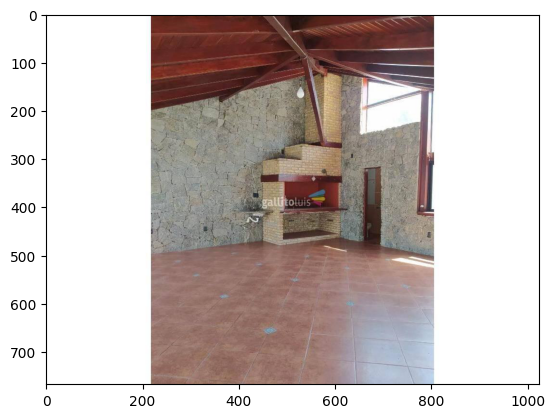

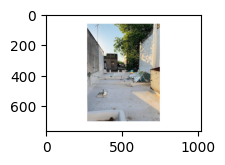

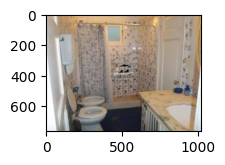

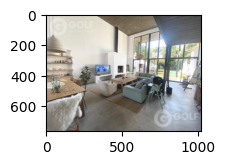

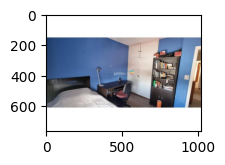

<Figure size 200x200 with 0 Axes>

APARTMENT


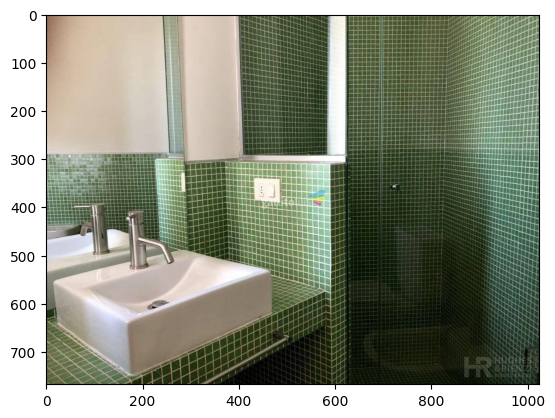

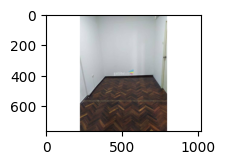

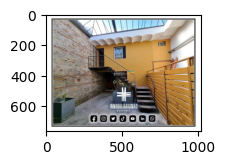

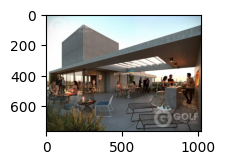

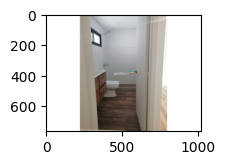

<Figure size 200x200 with 0 Axes>

In [5]:
import matplotlib.pyplot as plt
import glob, random
from tensorflow.keras.utils import load_img

for class_type in class_names:
    print(class_type)
    i = 0
    for i in range(5):
        images = glob.glob("images/train/"+str(class_type)+"/*.jpg")
        random_image = random.choice(images)

        # load the image
        img = load_img(random_image)

        plt.imshow(img)
        plt.figure(figsize=(2,2)) 
        i += 1
    plt.show()

#### Detele images from folders

In [15]:
# Clean folders
#!rm images/train/APARTMENT/*
#!rm images/validation/APARTMENT/*
#!rm images/train/HOUSE/*
#!rm images/validation/HOUSE/*


### Model Definition

In [6]:
import tensorflow as tf

# Model definition
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=(img_width, img_height, 3)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(32, (3, 3), padding='same', activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Dropout(0.3),
    
    tf.keras.layers.Conv2D(64, (3, 3), padding='same', activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(64, (3, 3), padding='same', activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Dropout(0.5),
    
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(2, activation = 'softmax')#Dense(1, activation='sigmoid')#(2, activation='softmax')
])

model.summary()

2023-06-11 18:37:19.282276: E tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:266] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 180, 180, 32)      896       
                                                                 
 batch_normalization (BatchN  (None, 180, 180, 32)     128       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 180, 180, 32)      9248      
                                                                 
 batch_normalization_1 (Batc  (None, 180, 180, 32)     128       
 hNormalization)                                                 
                                                                 
 max_pooling2d (MaxPooling2D  (None, 90, 90, 32)       0         
 )                                                               
                                                        

### Dataset Generation

In [7]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        rotation_range=20,
        width_shift_range=0.05,
        height_shift_range=0.05,
        vertical_flip=True,
        fill_mode="nearest")
test_datagen = ImageDataGenerator(rescale=1./255)
train_generator = train_datagen.flow_from_directory(
        'images/train',
        target_size=(img_height, img_width),
        batch_size=batch_size,
        class_mode='categorical')
validation_generator = test_datagen.flow_from_directory(
        'images/validation',
        target_size=(img_height, img_width),
        batch_size=batch_size,
        class_mode='categorical')

Found 1061 images belonging to 2 classes.
Found 361 images belonging to 2 classes.


### Model compilation

In [8]:
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Execution of model
history = model.fit(
        train_generator,
        steps_per_epoch=steps_per_epoch,
        epochs=epochs,
        validation_data=validation_generator,
        validation_steps=validation_steps)

Epoch 1/30
30/30 [==============================] - 71s 2s/step - loss: 1.0736 - accuracy: 0.5456 - val_loss: 1.3419 - val_accuracy: 0.7625
Epoch 2/30
30/30 [==============================] - 68s 2s/step - loss: 0.7321 - accuracy: 0.6302 - val_loss: 4.5776 - val_accuracy: 0.7688
Epoch 3/30


2023-06-11 18:37:41.734184: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]
2023-06-11 18:38:41.508277: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


## WANDB

In [10]:
import warnings
warnings.filterwarnings('ignore')

import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'

import wandb
from wandb.keras import WandbCallback

# Account Key
wandb.login(key="bb15b17a6eb09e20bb877cebbceb375ade025b37")

Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.
wandb: Currently logged in as: bastarrica-felipe (bgm-team). Use `wandb login --relogin` to force relogin
wandb: WARNING If you're specifying your api key in code, ensure this code is not shared publicly.
wandb: WARNING Consider setting the WANDB_API_KEY environment variable, or running `wandb login` from the command line.
wandb: Appending key for api.wandb.ai to your netrc file: /home/azureuser/.netrc


True

In [11]:
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.layers.experimental import preprocessing
from tensorflow.keras.models import Sequential
import numpy as np
import matplotlib.pyplot as plt
import random
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from wandb.keras import WandbMetricsLogger, WandbModelCheckpoint

# Launch 2 experiments, trying different dropout rates
for run in range(2):
    
    # Start a run, tracking hyperparameters
    wandb.init(
        project="ml-en-produccion",
        config={
        
            #"activation_1": "relu",
            "img_height": 180,
            "img_width": 180,
            "dropout": random.uniform(0.01, 0.80),
            "optimizer": "adam",
            "loss": "categorical_crossentropy",
            "metric": "accuracy",
            "epoch": 10,
            "batch_size": 32,
            "steps_per_epoch":30,
            "validation_steps":10
        },
    )
    config = wandb.config
    
    # Define el preprocesamiento de la imagen

    train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        rotation_range=20,
        width_shift_range=0.05,
        height_shift_range=0.05,
        vertical_flip=True,
        fill_mode="nearest")
    test_datagen = ImageDataGenerator(rescale=1./255)
    train_generator = train_datagen.flow_from_directory(
        'images/train',
        target_size=(config.img_height, config.img_width),
        batch_size=config.batch_size,
        class_mode='categorical')
    validation_generator = test_datagen.flow_from_directory(
        'images/validation',
        target_size=(config.img_height, config.img_width),
        batch_size=config.batch_size,
        class_mode='categorical')

    # Define tu modelo
    
    model = tf.keras.models.Sequential([
        tf.keras.layers.Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=(config.img_height, config.img_width, 3)),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Conv2D(32, (3, 3), padding='same', activation='relu'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.MaxPooling2D((2, 2)),
        tf.keras.layers.Dropout(0.3),
        
        tf.keras.layers.Conv2D(64, (3, 3), padding='same', activation='relu'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Conv2D(64, (3, 3), padding='same', activation='relu'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.MaxPooling2D((2, 2)),
        tf.keras.layers.Dropout(config.dropout),
        
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(64, activation='relu'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Dropout(config.dropout),
        tf.keras.layers.Dense(2, activation = 'softmax')#Dense(1, activation='sigmoid')#(2, activation='softmax')
    ])

    # Compila y entrena el modelo
    model.compile(optimizer=config.optimizer, loss=config.loss,  metrics=[config.metric])

    # Add WandbMetricsLogger to log metrics and WandbModelCheckpoint to log model checkpoints

    wandb_callbacks = [
        WandbMetricsLogger(),
        WandbModelCheckpoint(filepath="my_model_{epoch:02d}"),
    ]
    history = model.fit(
            train_generator,
            steps_per_epoch=config.steps_per_epoch,
            epochs=config.epoch,
            batch_size=config.batch_size,
            validation_data=validation_generator,
            validation_steps=config.validation_steps,
            callbacks=wandb_callbacks)
    
    wandb.finish()

Found 1061 images belonging to 2 classes.
Found 361 images belonging to 2 classes.
Epoch 1/10
30/30 [==============================] - 76s 2s/step - loss: 0.9971 - accuracy: 0.5380 - val_loss: 2.1775 - val_accuracy: 0.7594
Epoch 2/10
30/30 [==============================] - 73s 2s/step - loss: 0.8287 - accuracy: 0.5906 - val_loss: 3.9891 - val_accuracy: 0.7719
Epoch 3/10
30/30 [==============================] - 75s 2s/step - loss: 0.7430 - accuracy: 0.6420 - val_loss: 0.5559 - val_accuracy: 0.7781
Epoch 4/10
30/30 [==============================] - 74s 2s/step - loss: 0.7813 - accuracy: 0.6270 - val_loss: 1.6605 - val_accuracy: 0.7719
Epoch 5/10
30/30 [==============================] - 75s 2s/step - loss: 0.6839 - accuracy: 0.6823 - val_loss: 0.9143 - val_accuracy: 0.7625
Epoch 6/10
30/30 [==============================] - 74s 2s/step - loss: 0.6695 - accuracy: 0.6795 - val_loss: 0.6809 - val_accuracy: 0.6094
Epoch 7/10
30/30 [==============================] - 74s 2s/step - loss: 0.661

2023-06-11 18:44:07.180168: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]
2023-06-11 18:45:05.595928: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]
2023-06-11 18:45:17.657645: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'inputs' with dtype float and shape [?,90,90,32]
	 [[{{node inputs}}]]
2023-06-11 18:4

epoch/accuracy,▁▃▅▄▆▆▆▇██
epoch/epoch,▁▂▃▃▄▅▆▆▇█
epoch/learning_rate,▁▁▁▁▁▁▁▁▁▁
epoch/loss,█▅▄▄▃▂▂▁▁▁
epoch/val_accuracy,▇▇█▇▇▁▇▇▇█
epoch/val_loss,▄█▁▃▂▁▁▂█▃
epoch/accuracy,0.7299
epoch/epoch,9
epoch/learning_rate,0.001
epoch/loss,0.60826
epoch/val_accuracy,0.79062


Found 1061 images belonging to 2 classes.
Found 361 images belonging to 2 classes.
Epoch 1/10
30/30 [==============================] - 75s 2s/step - loss: 1.1667 - accuracy: 0.5616 - val_loss: 2.8276 - val_accuracy: 0.7531
Epoch 2/10
30/30 [==============================] - 76s 3s/step - loss: 0.8451 - accuracy: 0.6094 - val_loss: 7.5008 - val_accuracy: 0.7688
Epoch 3/10
30/30 [==============================] - 75s 2s/step - loss: 0.7618 - accuracy: 0.6510 - val_loss: 8.3991 - val_accuracy: 0.7688
Epoch 4/10
30/30 [==============================] - 76s 3s/step - loss: 0.6908 - accuracy: 0.6844 - val_loss: 30.9477 - val_accuracy: 0.7625
Epoch 5/10
30/30 [==============================] - 74s 2s/step - loss: 0.6456 - accuracy: 0.7010 - val_loss: 14.3228 - val_accuracy: 0.7750
Epoch 6/10
30/30 [==============================] - 74s 2s/step - loss: 0.6055 - accuracy: 0.7363 - val_loss: 33.4021 - val_accuracy: 0.7844
Epoch 7/10
30/30 [==============================] - 75s 2s/step - loss: 0.

2023-06-11 18:56:51.240372: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]
2023-06-11 18:57:49.638948: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]
2023-06-11 18:58:00.839511: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'inputs' with dtype float and shape [?,90,90,32]
	 [[{{node inputs}}]]
2023-06-11 18:5

epoch/accuracy,▁▃▄▅▆▇█▇▇▇
epoch/epoch,▁▂▃▃▄▅▆▆▇█
epoch/learning_rate,▁▁▁▁▁▁▁▁▁▁
epoch/loss,█▄▄▃▂▂▁▁▁▁
epoch/val_accuracy,▆▇▇▇▇█▇▇▁▂
epoch/val_loss,▁▂▃▇▄█▇▄▁▄
epoch/accuracy,0.75208
epoch/epoch,9
epoch/learning_rate,0.001
epoch/loss,0.53172
epoch/val_accuracy,0.6875


### Plot metrics

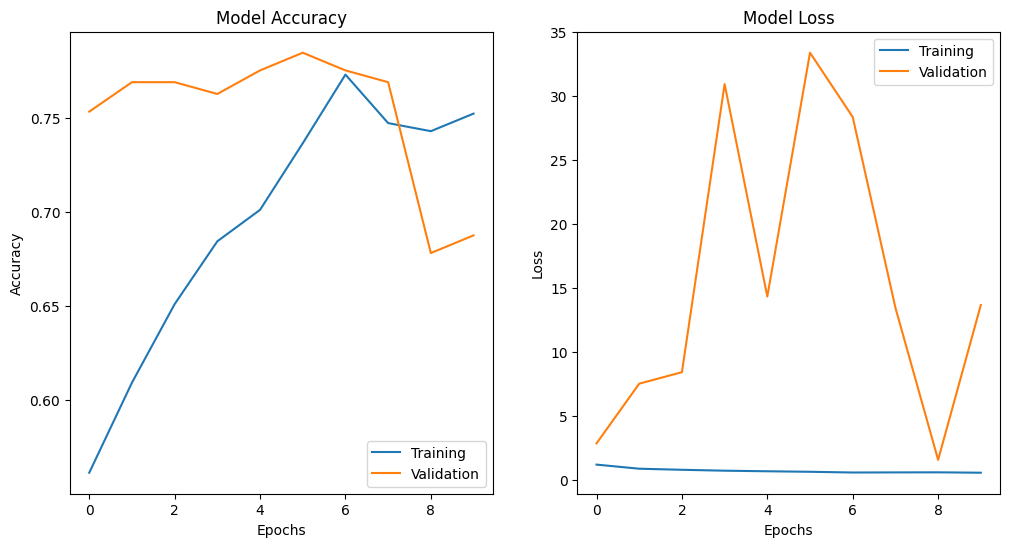

In [12]:
import pandas as pd
import matplotlib.pyplot as plt

def plot_history(history):
    history_df = pd.DataFrame(history.history)
    plt.figure(figsize=(12, 6))

    plt.subplot(1, 2, 1)
    plt.plot(history_df['accuracy'], label='Training')
    plt.plot(history_df['val_accuracy'], label='Validation')
    plt.title('Model Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(history_df['loss'], label='Training')
    plt.plot(history_df['val_loss'], label='Validation')
    plt.title('Model Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.savefig('training_validation_plots.png')
    plt.show()

# Call the plotting function to display the graphs
plot_history(history)

# Save the trained model
model.save('conv.h5')

### Gradio

In [13]:
import numpy as np

# load and evaluate a saved model
from numpy import loadtxt
from tensorflow.keras.models import load_model

# load model
model = load_model('conv.h5')

def classify_image(image):
    image = np.expand_dims(image, axis=0)
    prediction = model.predict(image)

    # Obtiene las etiquetas de las clases
    class_labels = ['HOUSE','APARTMENT']
    # Devuelve un diccionario con las etiquetas de las clases y sus probabilidades correspondientes
    return {class_labels[i]: float(prediction[0][i]) for i in range(2)}

In [15]:
import gradio as gr

iface = gr.Interface(
    fn=classify_image,  # la función que hace la clasificación
    inputs=gr.inputs.Image(shape=(img_height, img_width)),  # el tipo de entrada que espera tu modelo
    outputs=gr.outputs.Label(num_top_classes=2),  # el tipo de salida que produce tu modelo
)
iface.launch(share=True, debug=True)

Running on local URL:  http://127.0.0.1:7860
Running on public URL: https://0705337a820e532b65.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)


1/1 [==============================] - 0s 190ms/step
